In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
metadata_df = pd.read_csv("~/mrc/project/rna-seq/data/sita_eisa_inflammation_metadata.txt", sep="\t")

study = 'Inflammation'
notes = 'LPSinWTonly'

metadata_df = metadata_df[metadata_df['Study'] == study]

metadata_df.head()

# General GSE stats
total_gse = len(metadata_df['GSE'].unique())
total_comp = len(metadata_df.loc[metadata_df['SITA'] != ''])

print(f"""
Total GSEs: {total_gse}
Total comparisons: {total_comp}
""")


Total GSEs: 70
Total comparisons: 148



In [4]:
organism = 'Mus musculus'
cell_type = 'macrophage'

if cell_type == 'macrophage':
    cell_type_select = ['BMDM', 'macrophage', 'Macrophage']
elif cell_type == 'microglia':
    cell_type_select = ['microglia', 'Microglia']

select_df = metadata_df.loc[metadata_df['Organism'] == organism]
select_df = select_df[select_df['Cell/Tissue type'].str.contains('|'.join(cell_type_select))]

lps_wt_df = select_df.loc[(metadata_df['wt_comp'] == 1) &
                          (metadata_df['lps_only'] == 1)]

gses = lps_wt_df['GSE'].unique()

print(f"No. of GSEs: {len(gses)}")
print(gses)

lps_wt_df

No. of GSEs: 16
['GSE110243' 'GSE119380' 'GSE120807' 'GSE122292' 'GSE123596' 'GSE124410'
 'GSE125036' 'GSE131561' 'GSE134456' 'GSE147943' 'GSE157786' 'GSE55385'
 'GSE82043' 'GSE86922' 'GSE92618' 'GSE98563']


,GSE,Study,Organism,Cell/Tissue type,Treatment(s),Time (hr),Concentration (µg/ml),Genotype(s),Nmin,Nmax,...,lps_only,p_intron,EISA_nsig,EISA_Up:Down,DESeq_nsig,DESeq_Up:Down,SITA,Remarks,Other seq,Other comments
8,GSE110243,Inflammation,Mus musculus,BMDM (treated),"Untreated vs. LPS, +/-Dex",1,0.01,NELF-B (KO) vs. WT,2.0,3.0,...,1.0,0.017210,18.0,17.000000,220.0,4.116279,FALSE*?,NaN,None,NaN
19,GSE119380,Inflammation,Mus musculus,BMDM (treated),Untreated vs. LPS,6,NaN,SRF (KO) vs. WT,3.0,3.0,...,1.0,0.046430,1780.0,0.142490,7027.0,1.043327,TRUE,NaN,None,NaN
24,GSE120807,Inflammation,Mus musculus,BMDM (treated),"Unstimulated vs. LPS, +/- IFNa, +/- IFNg","4,8/4,8/4",1,None,3.0,9.0,...,1.0,0.014907,605.0,0.559278,4344.0,1.016713,TRUE?,NaN,None,NaN
26,GSE122292,Inflammation,Mus musculus,BMDM (treated),Untreated vs. LPS,"0.5, 1",0.01,NELF-B (KO) vs. WT,3.0,3.0,...,1.0,0.018010,14.0,NaN,22.0,NaN,FALSE*?,Global upregulation.,None,NaN
27,GSE122292,Inflammation,Mus musculus,BMDM (treated),Untreated vs. LPS,"0.5, 1",0.01,NELF-B (KO) vs. WT,3.0,3.0,...,1.0,0.017080,202.0,1.126316,268.0,2.621622,FALSE,NaN,None,NaN
30,GSE123596,Inflammation,Mus musculus,BMDM (treated),Normal vs. LPS,"1,18",0.1,None,3.0,3.0,...,1.0,0.022030,895.0,0.110422,1488.0,0.957895,TRUE,Positive control with Barbara's result (mouse).,None,NaN
32,GSE124410,Inflammation,Mus musculus,BMDM (treated),Untreated vs. LPS,"6, 16, 32",0.1,STK40 (KO) vs. WT,1.0,2.0,...,1.0,0.035620,0.0,NaN,3401.0,1.215635,NaN,NaN,None,NaN
33,GSE124410,Inflammation,Mus musculus,BMDM (treated),Untreated vs. LPS,"6, 16, 32",0.1,STK40 (KO) vs. WT,1.0,2.0,...,1.0,0.038830,163.0,0.442478,6407.0,1.134955,TRUE?,NaN,None,redo o
35,GSE124410,Inflammation,Mus musculus,BMDM (treated),Untreated vs. LPS,"6, 16, 32",0.1,STK40 (KO) vs. WT,1.0,2.0,...,1.0,0.039790,2733.0,1.735736,5910.0,1.065711,FALSE,NaN,None,NaN
37,GSE125036,Inflammation,Mus musculus,BMDM (treated),"Normal vs. LPS, +/- serine deprivation",4,0.1,None,2.0,2.0,...,1.0,0.019780,158.0,0.423423,3138.0,1.087824,TRUE?,NaN,None,NaN


In [4]:
# Create proteostasis table
proteo_list = pd.read_csv("/Users/pomato/mrc/project/rna-seq/data/Proteolist.csv", sep="\t")

if organism == 'Homo sapiens':
    proteo_df = pd.DataFrame({'gene_id': proteo_list['Human_gene_ID'],
                               'symbol': proteo_list['Human_Symbol']})
elif organism == 'Mus musculus':
    proteo_df = pd.DataFrame({'gene_id': proteo_list['Mouse_gene_ID'],
                               'symbol': proteo_list['Mouse_Symbol']})

proteo_df.dropna(subset=['gene_id'], inplace=True)
proteo_df.drop_duplicates(subset=['gene_id'], inplace=True)

print(f"No. of proteostasis genes: {len(proteo_df)} \n")

No. of proteostasis genes: 2022 



In [7]:
for gse in gses:
    proteo_df[gse] = np.nan

# fc_df = proteo_df
padj_df = proteo_df

for gse in gses:
    # Load DESeq2 output table
    deseq_files = glob.glob(f"/Users/pomato/mrc/project/rna-seq/data/deseq_outputs/{gse}*.txt")

    if len(deseq_files) > 0:
        deseq_df = pd.read_csv(deseq_files[0], sep="\t")

        print(f"{gse}: Filtering for proteostasis genes...")
        deseq_df_filt = deseq_df[deseq_df.index.isin(proteo_df['gene_id'])]
        print(f"{len(deseq_df_filt)} out of {len(deseq_df)} genes ({len(deseq_df_filt) / len(deseq_df) * 100}%) kept.")

        print(f"Filling proteostasis table with fold-change and padj values...\n")
        for i in deseq_df_filt.index.values:
            # fc_df.loc[fc_df.gene_id == i, gse] = deseq_df_filt.loc[i, 'log2FoldChange']
            padj_df.loc[padj_df.gene_id == i, gse] = deseq_df_filt.loc[i, 'padj']

        # z-score
        # print("Calculating z-score...\n")
        # fc_z_df[gse] = (fc_df[gse] - fc_df.mean().mean()) / fc_df[gse].std(ddof=0)
        # padj_z_df[gse] = (padj_df[gse] - padj_df.mean().mean()) / padj_df[gse].std(ddof=0)
    
    else:
        print(f"{gse}: DESeq2 output table not found. Skipping...\n")


# fc_df.to_csv(f"~/mrc/project/rna-seq/data/{study}_{notes}_{organism}_{cell_type}_foldChange.txt", sep="\t", header=True, index=False)
padj_df.to_csv(f"~/mrc/project/rna-seq/data/{study}_{notes}_{organism}_{cell_type}_padj.txt", sep="\t", header=True, index=False)

GSE110243: Filtering for proteostasis genes...
2021 out of 55401 genes (3.6479485929856863%) kept.
Filling proteostasis table with fold-change and padj values...

GSE119380: Filtering for proteostasis genes...
2021 out of 55401 genes (3.6479485929856863%) kept.
Filling proteostasis table with fold-change and padj values...

GSE120807: Filtering for proteostasis genes...
2021 out of 55401 genes (3.6479485929856863%) kept.
Filling proteostasis table with fold-change and padj values...

GSE122292: Filtering for proteostasis genes...
2021 out of 55401 genes (3.6479485929856863%) kept.
Filling proteostasis table with fold-change and padj values...

GSE123596: Filtering for proteostasis genes...
2021 out of 55401 genes (3.6479485929856863%) kept.
Filling proteostasis table with fold-change and padj values...

GSE124410: Filtering for proteostasis genes...
2021 out of 55401 genes (3.6479485929856863%) kept.
Filling proteostasis table with fold-change and padj values...

GSE125036: Filtering f

In [21]:
#### Fold-changes of custom genes
genes = ['Hdac9']
fc_custom = pd.DataFrame(index=genes, columns=gses)
padj_custom = pd.DataFrame(index=genes, columns=gses)

drop_gses = []

for gse in gses:
    # Load DESeq2 output table
    deseq_files = glob.glob(f"/Users/pomato/mrc/project/rna-seq/data/deseq_outputs/{gse}*.txt")
    if len(deseq_files) > 0:
        deseq_df = pd.read_csv(deseq_files[0], sep="\t")

        for gene in genes:
            fc_custom.loc[gene, gse] = deseq_df.loc[deseq_df['geneSymbol'] == gene, 'log2FoldChange'][0]
            padj_custom.loc[gene, gse] = deseq_df.loc[deseq_df['geneSymbol'] == gene, 'padj'][0]
    else:
        print(f"{gse} DESeq2 output file not found.")
        drop_gses.append(gse)

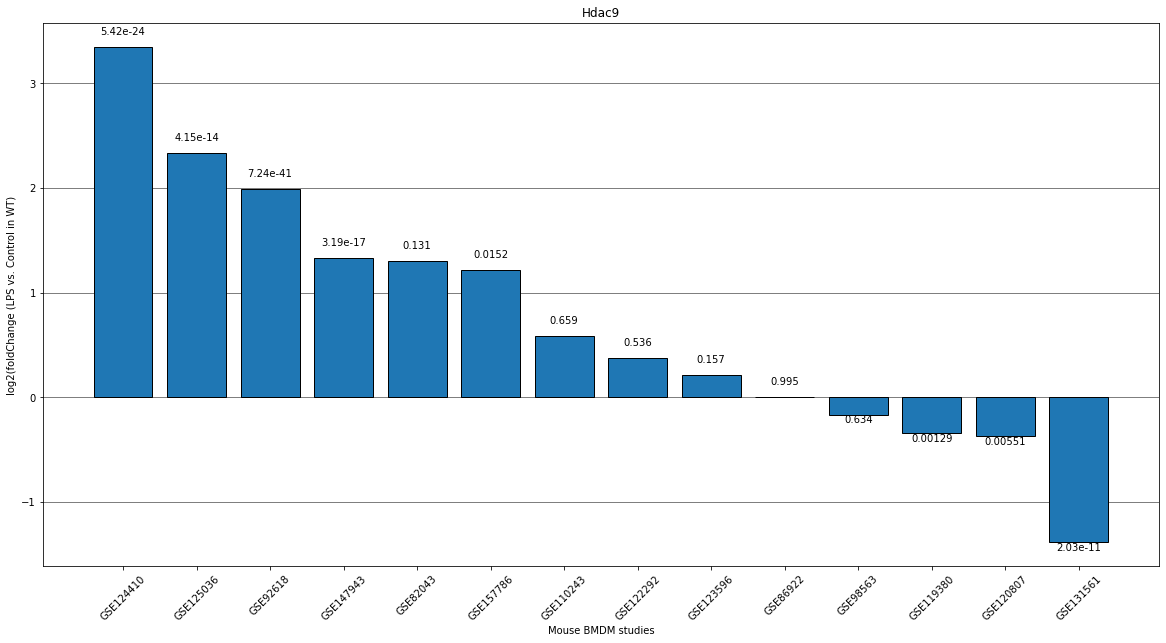

In [23]:
# Bar plot
gene = 'Hdac9'

fc_custom_drop = fc_custom.drop(drop_gses, axis=1)
padj_custom_drop = padj_custom.drop(drop_gses, axis=1)

fc_gene = fc_custom_drop.loc[gene].sort_values(ascending=False)
padj_gene = padj_custom_drop.loc[gene].reindex(fc_gene.index)

gses = fc_gene.index.tolist()
fcs = fc_gene.values.tolist()
padjs = padj_gene.values.tolist()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(gses, fcs, edgecolor='black')

# Add padj as labels
rects = ax.patches
labels = ['%.3g' % padj for padj in padj_gene.tolist()]

for rect, label in zip(rects, labels):
    height = rect.get_height()

    shift = 0.1 if height > 0 else -0.1
    
    ax.text(rect.get_x() + rect.get_width() / 2, height + shift, label,
            ha='center', va='bottom')

plt.xticks(rotation=45)
plt.xlabel("Mouse BMDM studies")
plt.ylabel("log2(foldChange) (LPS vs. Control in WT)")
plt.title(gene)

ax.yaxis.grid(linewidth=0.5,color='black')
ax.set_axisbelow(True)

In [16]:
drop_gses

['G',
 'S',
 'E',
 '5',
 '5',
 '3',
 '8',
 '5',
 'G',
 'S',
 'E',
 '1',
 '3',
 '4',
 '4',
 '5',
 '6']